## Task: Restaurant Chains
#### Identify if there are any restaurant chains present in the dataset.
#### Analyze the ratings and popularity of different restaurant chains.



 ### Importing the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data set


In [2]:
df=pd.read_excel(r"C:\Users\Lenovo\Downloads\cleaned_data_cognifyz.xlsx")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,İstanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,İstanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Identifying Restaurant Chains

In [4]:
chains = df['Restaurant Name'].value_counts()
chains = chains[chains > 1]
chains


Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Shyam Sweets                       2
Ceviche Tapas Bar & Restaurant     2
Punjabi Chicken                    2
Zaika Kathi Rolls                  2
U Like                             2
Name: count, Length: 733, dtype: int64

### Analyze Ratings and Popularity

In [5]:

# Filterin the data for only the restaurant chains
dc = df[df['Restaurant Name'].isin(chains.index)]

# Group by 'Restaurant Name' to calculate the count of restaurants in each chain
count = dc[['Restaurant Name', 'Aggregate rating', 'Votes']].groupby('Restaurant Name').agg(
    total_restaurants=('Restaurant Name', 'count'),
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
)

count


,total_restaurants,avg_rating,total_votes
Restaurant Name,,,
10 Downing Street,2,4.000000,670
221 B Baker Street,3,3.366667,215
34 Parkstreet Lane,2,3.050000,31
"34, Chowringhee Lane",12,2.791667,777
4700BC Popcorn,2,3.500000,176
...,...,...,...
Zaika,4,2.850000,245
Zaika Kathi Rolls,2,1.500000,16
Zizo,3,3.866667,1371


### Analyzing and Viewing Results

In [6]:
# Sorting by total votes to find the most popular chains
popular_chains = count.sort_values(by='total_votes', ascending=False).head(10)
popular_chains



,total_restaurants,avg_rating,total_votes
Restaurant Name,,,
Barbeque Nation,26,4.353846,28142
AB's - Absolute Barbecues,4,4.825000,13400
Big Chill,4,4.475000,10853
Farzi Cafe,6,4.366667,10098
Truffles,2,3.950000,9682
Chili's,5,4.580000,8156
Joey's Pizza,2,4.250000,7807
Big Yellow Door,3,4.266667,7511
Saravana Bhavan,3,4.133333,7238


In [7]:
# Sorting by average rating to find the best-rated chains
best_rated_chains = count.sort_values(by='avg_rating', ascending=False).head(10)
best_rated_chains


,total_restaurants,avg_rating,total_votes
Restaurant Name,,,
Talaga Sampireun,3,4.900,5514
Silantro Fil-Mex,2,4.850,1364
AB's Absolute Barbecues,2,4.850,3151
AB's - Absolute Barbecues,4,4.825,13400
Naturals Ice Cream,2,4.800,3094
Gymkhana,2,4.700,328
The Cheesecake Factory,2,4.650,3010
Dishoom,2,4.600,1269
Garota de Ipanema,2,4.600,59


### Bar Graph for Most Popular Chains



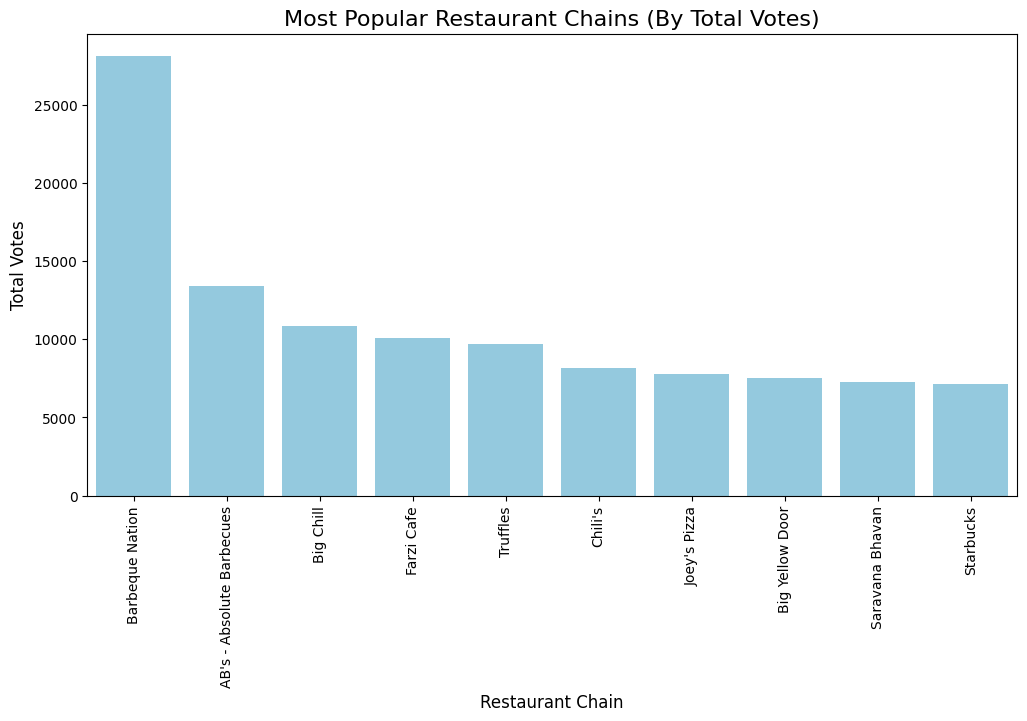

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_chains.index, y=popular_chains['total_votes'], color='skyblue')
plt.title('Most Popular Restaurant Chains (By Total Votes)', fontsize=16)
plt.xlabel('Restaurant Chain', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Bar Graph for Best-Rated Chains



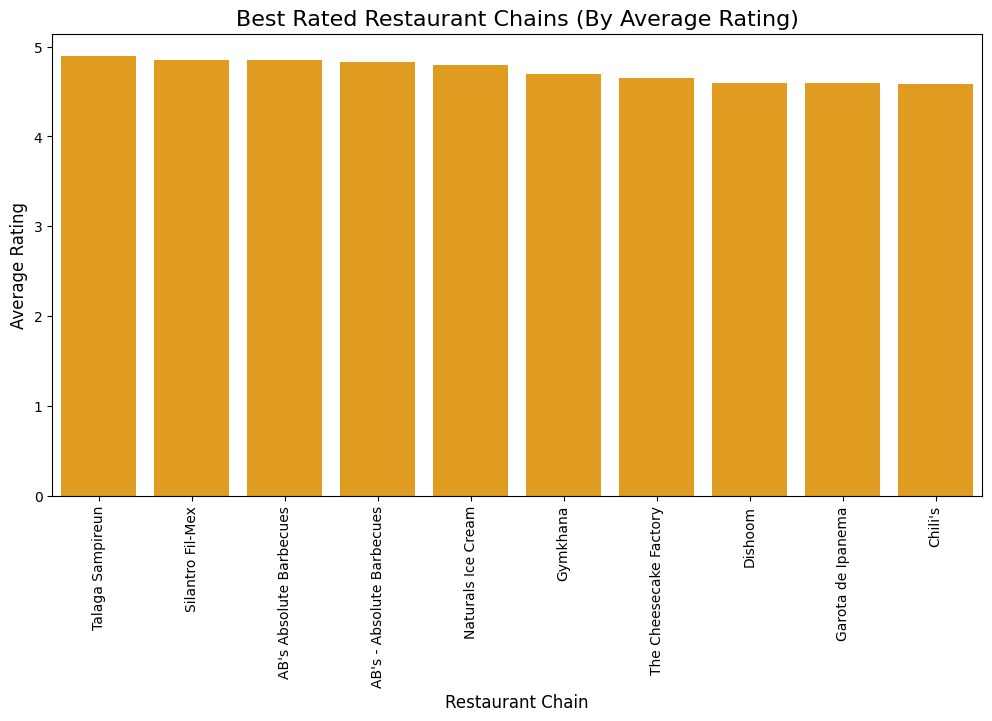

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=best_rated_chains.index, y=best_rated_chains['avg_rating'], color='orange')
plt.title('Best Rated Restaurant Chains (By Average Rating)', fontsize=16)
plt.xlabel('Restaurant Chain', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()
